# M2 - WEEK 5 | PROJECT: Visualizing Data for Different Teams




 # STORY FOR THIS PROJECT:



## Business Case: 
**The CEO "Mr. James Disouza" of a department store chain "Metro Spencers" wants to expand a new chain dedicated to Womens Shoes.**

#### As a Data Scientist, I will gather the data from latest market trend in the Womens' Shoes market  and analyse the same. Based on my findings I am going to suggest the CEO, Manager and the Team on what range of shoes and from which brands they should import to get good sales and hence good turnover.


### Scope:
* Present the Business Solution to CEO
* Present to the Managers to make specific actions.
* Present to the Procurement Team with more insights for doable tasks. 

### Information about the dataset:
**Data set is picked from :  https://www.kaggle.com/datafiniti/womens-shoes-prices/**

This is a list of 10,000 women's shoes and their product information provided by Datafiniti's Product Database March 2019 and May 2019.

The dataset includes shoe name, brand, price, and more. Each shoe will have an entry for each price found for it and some shoes may have multiple entries. Each shoe listing includes a variation of the phrase Women's Shoes within the Category field, will have an entry for each price found for it, and some shoes may have multiple entries. 



## Step 1 : Import the dataset

In [1]:
# Import packages needed for the procedure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

# Display all the columns.
pd.set_option('display.max_columns', 35) 

In [2]:
# Load and read the data
# We will name the womens shoes dataframe with prefix ws_df
ws_df = pd.read_csv('Datafiniti_Womens_Shoes_Jun19.csv')

## Step 2: Data Understanding Phase
**Lets get the structure and features of this dataset.**

In [3]:
# Get some useful insights about this data set to take specific actions for the data cleaning.
ws_df_columns = ws_df.columns.tolist()
print("\n\nThe columns containing the features of this dataset are:\n", ws_df_columns)
print("\n\nDIMENSION of the table is:\n", ws_df.shape)
print("\n\nDATATYPES in the table are:\n", ws_df.dtypes)
print ("\n\nFirst few observations: \n", ws_df.head(2))



The columns containing the features of this dataset are:
 ['id', 'dateAdded', 'dateUpdated', 'asins', 'brand', 'categories', 'primaryCategories', 'colors', 'dimension', 'ean / upc', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'prices.amountMax', 'prices.amountMin', 'prices.availability', 'prices.color', 'prices.condition', 'prices.currency', 'prices.dateAdded', 'prices.dateSeen', 'prices.isSale', 'prices.merchant', 'prices.offer', 'prices.returnPolicy', 'prices.shipping', 'prices.size', 'prices.sourceURLs', 'sizes', 'sourceURLs']


DIMENSION of the table is:
 (10000, 32)


DATATYPES in the table are:
 id                      object
dateAdded               object
dateUpdated             object
asins                   object
brand                   object
categories              object
primaryCategories       object
colors                  object
dimension               object
ean / upc                int64
imageURLs               object
keys                    o

## Step 3: DATA CLEANUP

By looking at the breadth and features of the data, it is clear that there are many null values, and not so useful columns for the current requirement of analysis. We need to clean this data to further analyse them.

### Data Cleanup phase 1: Cleanup  missing values

In [4]:
# Query for any missing values
ws_df.isnull().any()

id                     False
dateAdded              False
dateUpdated            False
asins                   True
brand                  False
categories             False
primaryCategories      False
colors                 False
dimension               True
ean / upc              False
imageURLs               True
keys                   False
manufacturer            True
manufacturerNumber      True
name                   False
prices.amountMax       False
prices.amountMin       False
prices.availability    False
prices.color           False
prices.condition        True
prices.currency        False
prices.dateAdded        True
prices.dateSeen        False
prices.isSale           True
prices.merchant         True
prices.offer           False
prices.returnPolicy     True
prices.shipping         True
prices.size            False
prices.sourceURLs      False
sizes                  False
sourceURLs             False
dtype: bool

**From above we can see that, there are quite number of columns having missing values. Lets now look at the percentage of the missing values on each column.**

In [5]:
#Calculating the percentage of missing values
percentage = (ws_df.isnull().sum()/len(ws_df))*100
percentage.sort_values(inplace=True)
print (percentage)

id                       0.00
prices.sourceURLs        0.00
prices.size              0.00
prices.offer             0.00
prices.dateSeen          0.00
prices.currency          0.00
prices.color             0.00
prices.availability      0.00
prices.amountMin         0.00
sizes                    0.00
name                     0.00
prices.amountMax         0.00
sourceURLs               0.00
ean / upc                0.00
dateAdded                0.00
colors                   0.00
primaryCategories        0.00
dateUpdated              0.00
categories               0.00
keys                     0.00
brand                    0.00
imageURLs               73.57
manufacturerNumber      85.69
prices.isSale           86.36
manufacturer            86.38
dimension               95.35
prices.shipping         99.51
asins                   99.95
prices.returnPolicy    100.00
prices.condition       100.00
prices.merchant        100.00
prices.dateAdded       100.00
dtype: float64


* **From the above we find that few columns have more than 80% of missing values.** 
* **These columns are not very useful for the data analysis for this context. Hence, we will remove these columns.**
* **Since imageURLs have 73.75% of the missing data, and without this column, as a Data Scientist I can still churn a very good useful infromation. Hence dropping this column too**

In [6]:
# Drop the columns having loads of missing data
ws_df = ws_df.drop(columns =['manufacturerNumber', 'prices.isSale','manufacturer','dimension', 'prices.shipping', 
                             'asins', 'prices.returnPolicy', 'prices.condition', 'prices.merchant',
                             'prices.dateAdded', 'imageURLs']) 

### Data Cleanup Phase 2: Cleanup the not so much required columns

**Lets clean up more columns which might not make more sense for our analysis.**

**Columns which can be dropped:**
    * categories : Since we are looking into shoe category which is our primary category, we can drop this column. 
    * primaryCategories: Since we are dealing with shoes, we will drop this straightaway.
    * keys: A list of internal Datafiniti identifiers for this product. Hence we can drop this too.
    * ean: (European Article Number) is a standard describing a barcode symbology and numbering system used in global trade to identify a specific retail product type. We may drop this too. 
    * id: Unique id. This can be dropped too
    * pricesavailability: A true or false if this product is available at this price. Hence we can drop this.
    * Drop columns prices.sourceURLs, dateAdded, dateUpdated, prices.dateseen,sourceURLs
    * Dropping the prices.currency since everything is in USD
    
    The reason for dropping these columns can be seen in https://developer.datafiniti.co/docs/product-data-schema   
    
    

In [7]:
ws_df = ws_df.drop(columns=['id', 'categories', 'keys', 'ean / upc', 'primaryCategories', 
                              'prices.sourceURLs','dateAdded','dateUpdated','prices.dateSeen', 'sourceURLs', 'prices.currency'])

In [8]:
ws_df.head(2)

,brand,colors,name,prices.amountMax,prices.amountMin,prices.availability,prices.color,prices.offer,prices.size,sizes
0,City Classified,Black,City Classified Stylish-S Women's Zipper Ankle...,29.95,29.95,True,Black,Online only,8,8
1,Skechers,Taupe,"Skechers Women'S You Radiate, Walking",84.00,84.00,True,Taupe,Online only,6 M US,6 M US


###  Completion of Data Cleaning phase

### STEP 4 : Data Analysis and Data Visualization Phase

In [9]:
# print unique data of columns having unique data less than 10.
ws_df_columns = ws_df.columns.tolist()
for col in ws_df_columns:
    #print ("\nThe uniqueness of col: ", col, "is")
    #print (bank_df[col].unique())
    print ("\nThe length of the unique size of column ", col, ":" , len(ws_df[col].unique()))


The length of the unique size of column  brand : 505

The length of the unique size of column  colors : 1910

The length of the unique size of column  name : 2830

The length of the unique size of column  prices.amountMax : 2242

The length of the unique size of column  prices.amountMin : 2242

The length of the unique size of column  prices.availability : 2

The length of the unique size of column  prices.color : 1853

The length of the unique size of column  prices.offer : 104

The length of the unique size of column  prices.size : 467

The length of the unique size of column  sizes : 494


**We see that for every price, there is a prices.amountMax and prices.amountMin. Lets create a pricesAverage with these 2 columns.**
### Add column pricesAverage

In [10]:
ws_df["prices.average"] = (ws_df["prices.amountMin"]+ws_df["prices.amountMax"])/2
ws_df.head(2)

,brand,colors,name,prices.amountMax,prices.amountMin,prices.availability,prices.color,prices.offer,prices.size,sizes,prices.average
0,City Classified,Black,City Classified Stylish-S Women's Zipper Ankle...,29.95,29.95,True,Black,Online only,8,8,29.95
1,Skechers,Taupe,"Skechers Women'S You Radiate, Walking",84.00,84.00,True,Taupe,Online only,6 M US,6 M US,84.00


## ANALYSIS USING SHOE COLORS
## Analysis 1
### Lets see which color is the most sold in womens shoes
From the above data, we can see that the colors has a lot of messed up data.
Lets do some cleaning so that it will be bit easier to analyse the colors data.

### Data cleaning for colors:
* For every straight  name of colors, convert all the strings of colors to lower strings.
* For every colors which is represented as digits, lets call them digitized. Because we dont have any proper data on the digitized codes of the color names.
* For all others, lets call them multicolorOrUnknown

In [11]:
color_column = list(ws_df['colors'])
new_color_column = []
for each in color_column:
    if each.isalpha():
        each = each.lower()
    elif each.isdigit():
        each = each.replace(each,"digitized")
    else:
        each = each.replace(each,"multicolor")
    new_color_column.append(each)

ws_df['colors'] = new_color_column
ws_df['colors'].head()


0         black
1         taupe
2         black
3    multicolor
4         white
Name: colors, dtype: object

## OUTCOMES 1: 

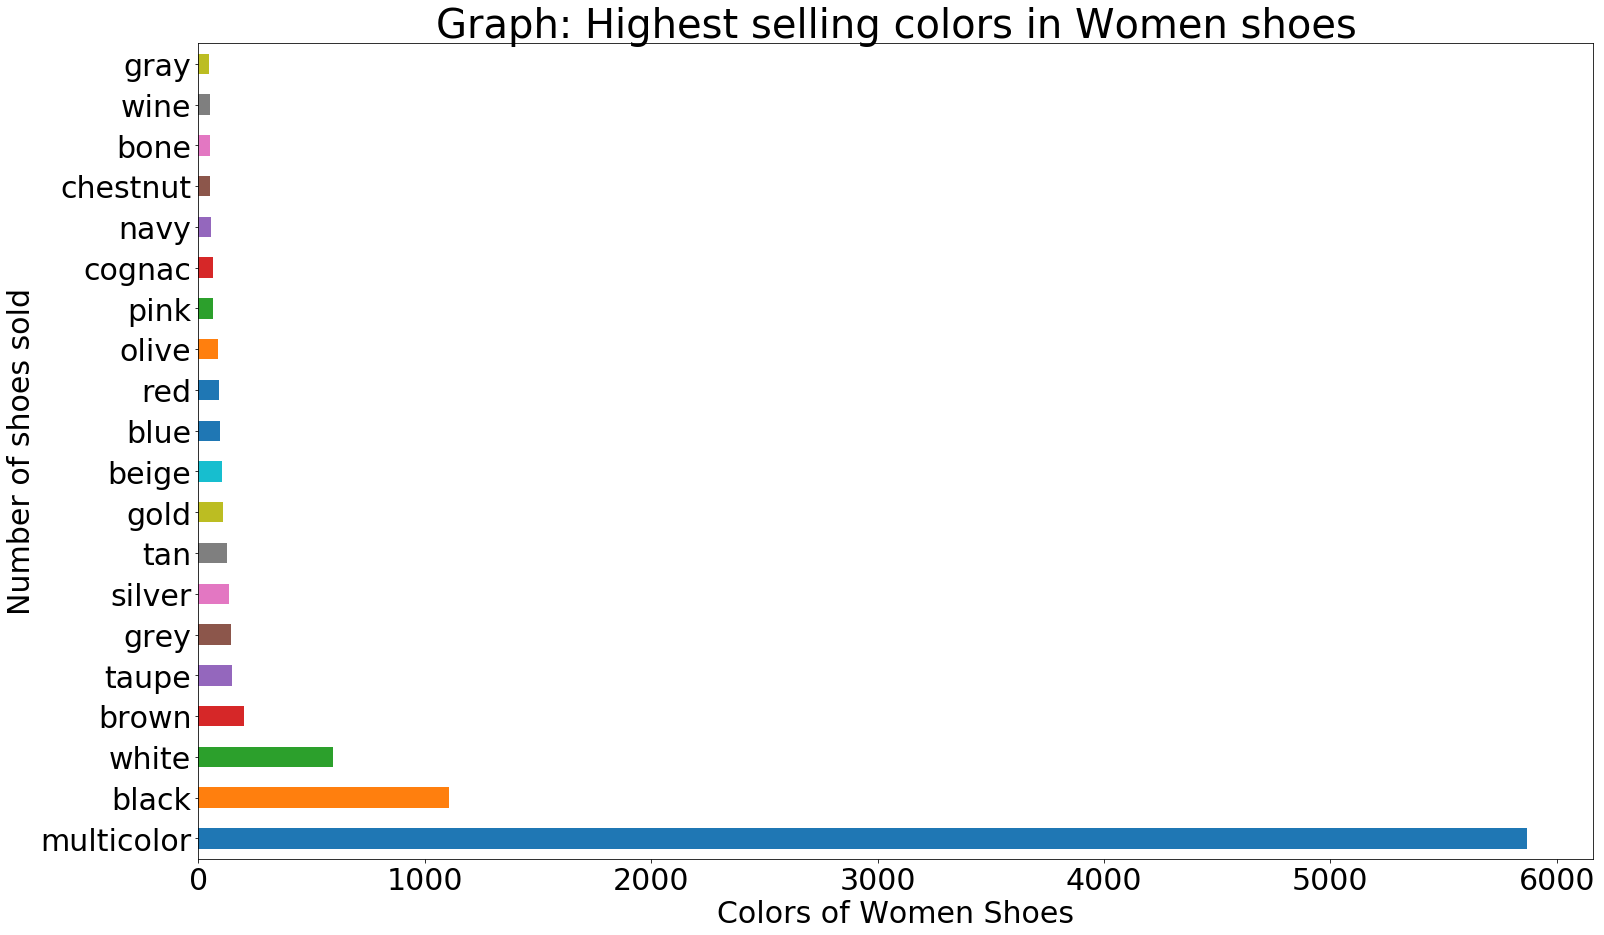

In [12]:
plt.figure(figsize=(25,15))
plt.title("Graph: Highest selling colors in Women shoes",fontsize=40)
plt.xlabel("Colors of Women Shoes",fontsize=30)
plt.ylabel("Number of shoes sold",fontsize=30)
plt.tick_params(labelsize=30)
ws_df['colors'].value_counts()[:20].plot(kind='barh')


# Inference 1:
**Multicolors may be like florals or other designs. They dont have a single color or same shoes is sold with different colors. Or a single shoe must have more than one color on it. And from the above graph, we can see that these kind of shoes are the most sold.**

**With the above graph its clear that the top 5 colors in women shoes sold are :**
* Black (The highest)
* White
* Brown
* Taupe
* Grey

## Analysis 2: 
## Lets see if  price of shoes vary with the color

In [13]:
# Creating dataframes for top selling colors and few other colors too
black_shoes = ws_df[:][ws_df["colors"] == "black"]
white_shoes = ws_df[:][ws_df["colors"] == "white"]
brown_shoes = ws_df[:][ws_df["colors"] == "brown"]
taupe_shoes = ws_df[:][ws_df["colors"] == "taupe"]
grey_shoes = ws_df[:][ws_df["colors"] == "grey"]
silver_shoes = ws_df[:][ws_df["colors"] == "silver"]
blue_shoes = ws_df[:][ws_df["colors"] == "blue"]
gold_shoes = ws_df[:][ws_df["colors"] == "gold"]
pink_shoes = ws_df[:][ws_df["colors"] == "pink"]
gray_shoes = ws_df[:][ws_df["colors"] == 'gray']
wine_shoes = ws_df[:][ws_df["colors"] == 'wine']
multicolor_shoes = ws_df[:][ws_df["colors"] == 'multicolor']


## OUTCOMES 2: 

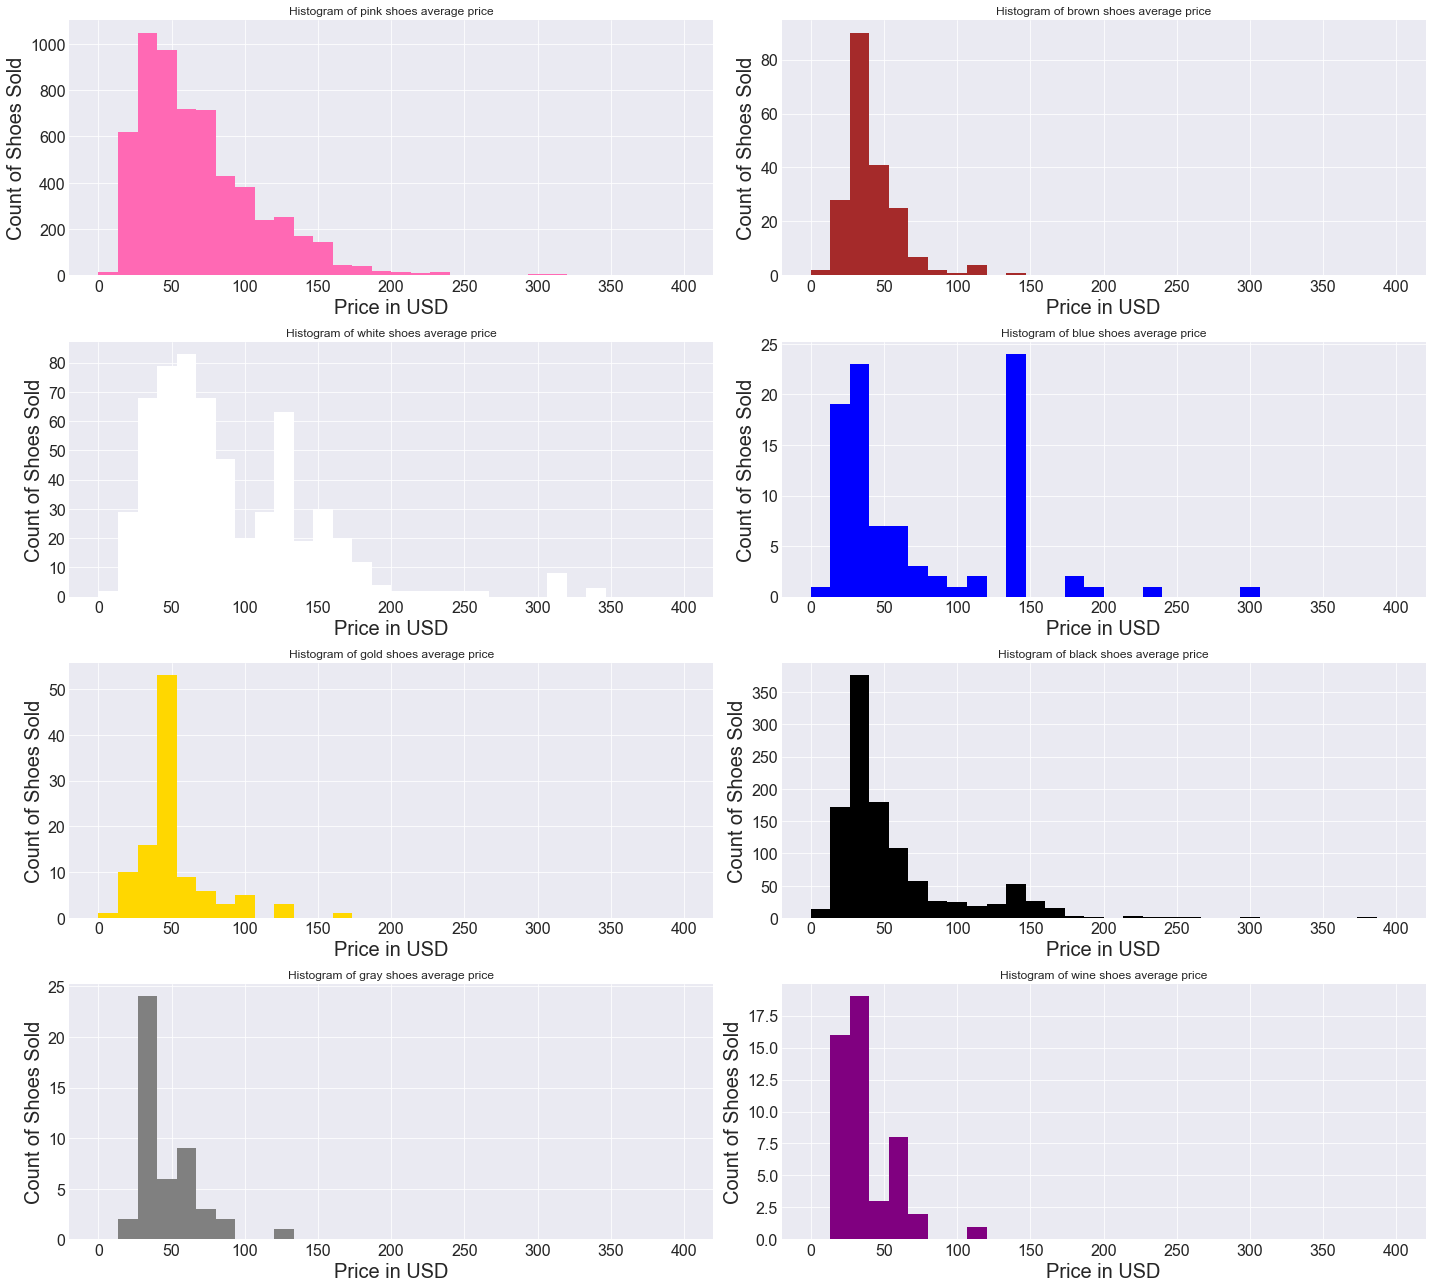

In [14]:
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols=2, figsize=(20, 18))

#fig, ax = plt.subplots(4, 2, sharex='col', sharey='row')



multicolor_shoes["prices.average"].plot(kind="hist", ax=axes[0,0], range=(0,400),  color="hotpink",
                                  title='Histogram of pink shoes average price', bins=30, fontsize=16)
brown_shoes["prices.average"].plot(kind="hist", ax=axes[0,1], range=(0,400), color="brown", 
                                   title='Histogram of brown shoes average price', bins=30, fontsize=16 )
white_shoes["prices.average"].plot(kind="hist", ax=axes[1,0], range=(0,400), color="white",
                                   title='Histogram of white shoes average price', bins=30, fontsize=16)
blue_shoes["prices.average"].plot(kind="hist", ax=axes[1,1], range=(0,400), color="blue", 
                                  title='Histogram of blue shoes average price', bins=30, fontsize=16)
gold_shoes["prices.average"].plot(kind="hist", ax=axes[2,0], range=(0,400), color="gold",
                                  title='Histogram of gold shoes average price', bins=30, fontsize=16)
black_shoes["prices.average"].plot(kind="hist", ax=axes[2,1], range=(0,400), color="black", 
                                   title='Histogram of black shoes average price', bins=30, fontsize=16)
gray_shoes["prices.average"].plot(kind="hist", ax=axes[3,0], range=(0,400), color="grey" ,
                                  title='Histogram of gray shoes average price', bins=30, fontsize=16)
wine_shoes["prices.average"].plot(kind="hist", ax=axes[3,1], range=(0,400), color="purple",
                                  title='Histogram of wine shoes average price', bins=30, fontsize=16)


#added xlable in loop for all subplot:
i=0
while(i<=3):
    for j in [0,1]:
        axes[i,j].set_xlabel("Price in USD",fontsize=20)
        axes[i,j].set_ylabel("Count of Shoes Sold",fontsize=20)
    i = i + 1

plt.tight_layout()

# INFERENCE 2: 

As we can see from the above that colors have a difference in the price range. 
Colors are rated with different margin for different colors. 
* Mulitcolor shoes are highly sold in the range of 20 to 70. Also there is a very good amount sales in the range of 80 to 150. 
* Pink, Brown, Gray, Black, Blue, Wine,Gold and White all these have highest sales in margin 20 to 50 and good sales in range 50 to 100
* Blue is having highest sales in 120 to 150 margin.
* Pink, Brown, Gray,Wine color shoes have margin only upto 150. 
* White and Black and Blue have gone beyond 300 USD for margins.




## Analysis 3: 
## TOP SELLING BRANDS

**This will give us trivial information on the Brands of shoes which the store can host to get attract more customers**


## OUTCOME 3: 


In [15]:
ws_df['brand'].value_counts()[:25]

Brinley Co.                 1007
Propet                       643
SAS                          455
Trotters                     449
Soda                         360
Pleaser                      350
Aerosoles                    235
L'Artiste by Spring Step     229
Drew                         196
Easy Street                  159
City Classified              149
Softwalk                     133
New Balance                  130
David Tate                   120
SoftWalk                     110
Steve Madden                 106
Floral                        94
Unique Bargains               93
Nature Breeze                 91
Ros Hommerson                 83
Skechers                      79
Pleaser Pink Label            75
Funtasma                      73
PleaserUSA                    72
Qupid                         72
Name: brand, dtype: int64

## INFERENCE 3: 
**The Brand "Brinley Co" tops with 1007 shoes sold. And then nextthree on an average is having a sold count of 600 and so on. These brands will give good volume business**

## Analysis 4: 
### Lets get an overview of the Top selling brands with Top selling colors. 
**This will help us to chose the brands for different colors of women shoes in the store**
The 6 Top selling colors are : Black, White, Brown, Taupe, Grey, Silver


## OUTCOMES 4: 

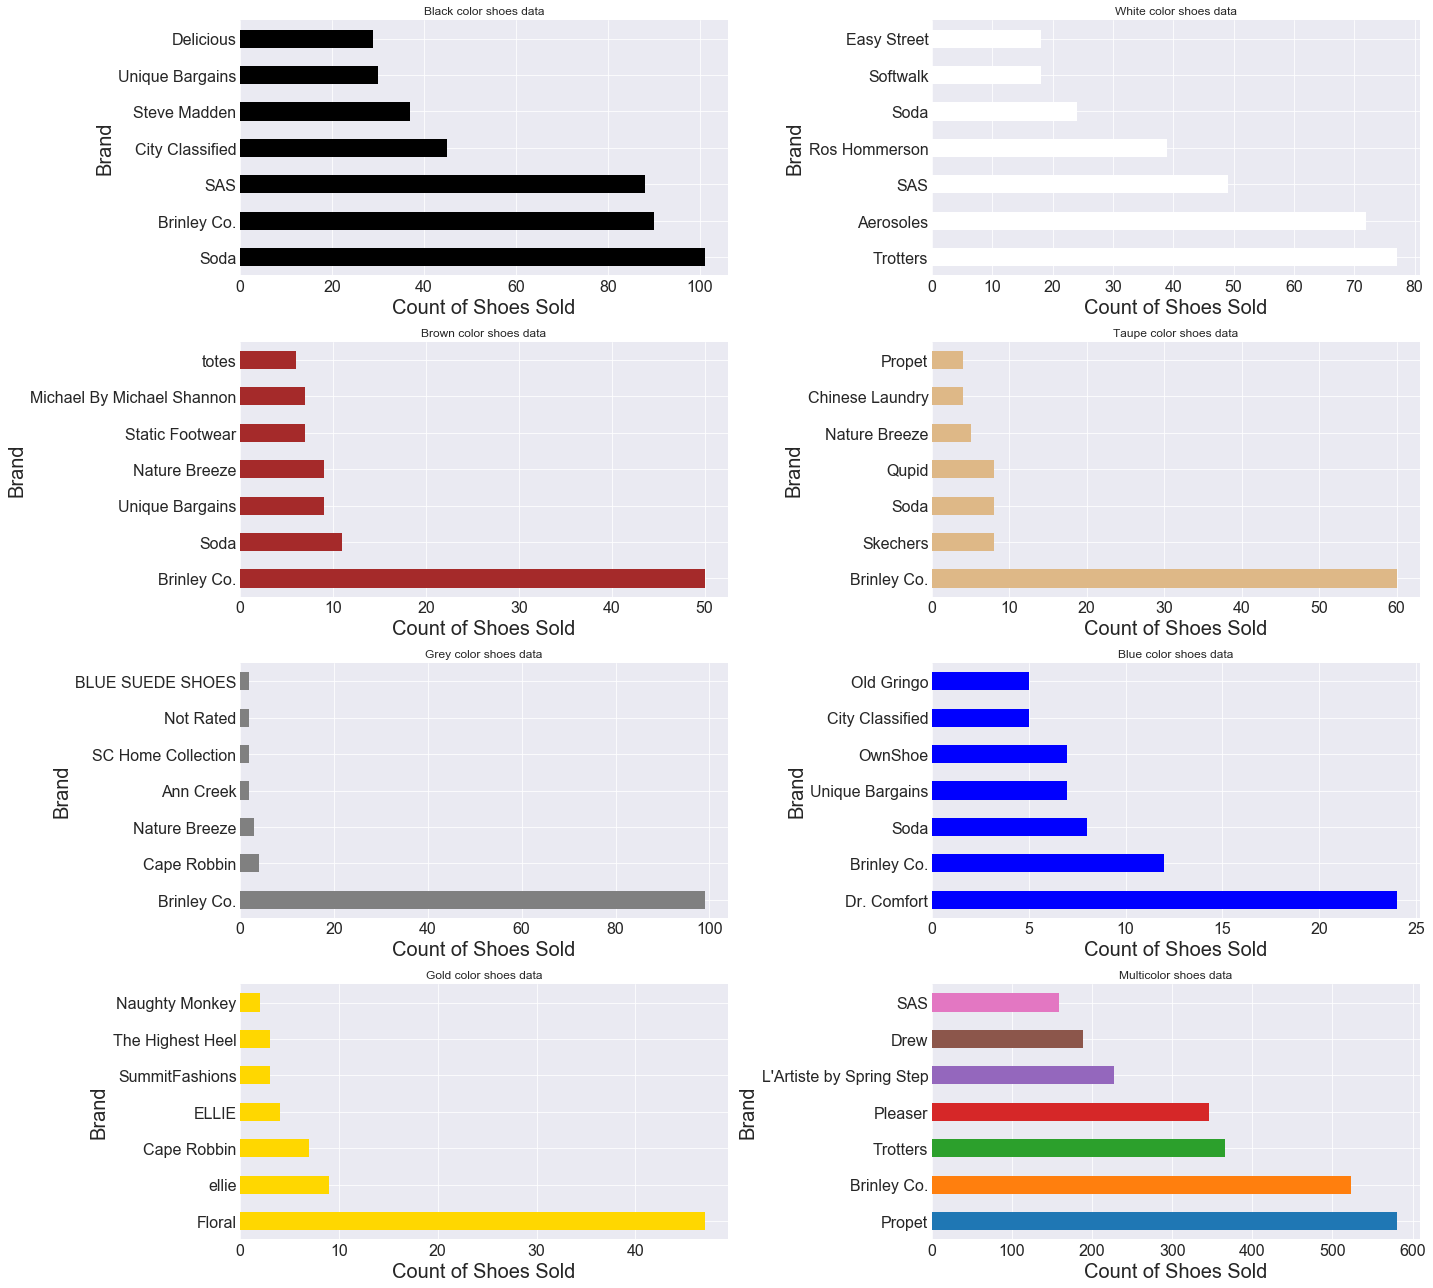

In [16]:
# Top selling brands for Top selling colors
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols=2, figsize=(20, 18))

black_shoes['brand'].value_counts()[:7].plot(kind="barh", ax=axes[0,0], 
                                             color = 'black', title='Black color shoes data',  fontsize = 16)
white_shoes['brand'].value_counts()[:7].plot(kind="barh", ax=axes[0,1], 
                                             color = 'white', title='White color shoes data', fontsize = 16)
brown_shoes['brand'].value_counts()[:7].plot(kind="barh", ax=axes[1,0], 
                                             color = 'brown', title='Brown color shoes data', fontsize = 16)
taupe_shoes['brand'].value_counts()[:7].plot(kind="barh", ax=axes[1,1], 
                                             color = 'burlywood', title='Taupe color shoes data', fontsize = 16)
grey_shoes['brand'].value_counts()[:7].plot(kind="barh", ax=axes[2,0], 
                                            color = 'grey', title='Grey color shoes data', fontsize = 16)
blue_shoes['brand'].value_counts()[:7].plot(kind="barh", ax=axes[2,1], 
                                            color = 'blue', title='Blue color shoes data', fontsize = 16)
gold_shoes['brand'].value_counts()[:7].plot(kind="barh", ax=axes[3,0],
                                            color = 'gold', title='Gold color shoes data', fontsize = 16)
multicolor_shoes['brand'].value_counts()[:7].plot(kind="barh", ax=axes[3,1],
                                                  title='Multicolor shoes data', fontsize = 16)

# Add xlable using while loop for all subplot:
i=0
while(i<=3):
    for j in [0,1]:
        axes[i,j].set_xlabel("Count of Shoes Sold", fontsize=20)
        axes[i,j].set_ylabel("Brand", fontsize=20)
    i = i + 1

plt.tight_layout()

## Inference 4:
As seen in the above graphs, we can see that the top selling colors are seen from different brands. 
* The company **Brinley Co** has the most amount of occurances and easily seen in the graph that it has a huge amount of customer base in different colors. 
* Other top most brands seen are **Soda, SAS, Natural Breeze, Propet, Trotters**
* White color shoes have mostly seen from brands **Trotters and aerosales.** 

## Analysis 5: 

## Discounts versus Sales
**Lets now get an overview if there are more sales if the product is on discount**.


In [17]:
# lets clean up the data to make it more categorical for the discounted versus non discounted. 

# Copy the prices.offer column to a list
offer_column= list(ws_df['prices.offer'])
# Create an empty list which we will append with the categorical data and assign it back to the prices.offer column
new_offer_column = []

for each in offer_column:
    if ":" in each:
        each = each.replace(each,"On Offer")
    elif "Was" in each:
        each = each.replace(each,"Was Discounted")
    else:
        each = each.replace(each,"Fixed Price")
    new_offer_column.append(each)

ws_df['prices.offer'] = new_offer_column                


## OUTCOMES 5: 

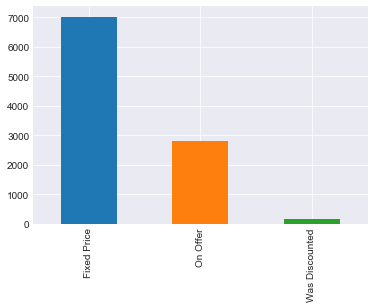

In [18]:
# Plot the sales data with the discounted and non discounted price
ws_df['prices.offer'].value_counts().plot(kind='bar')

## INFERENCE 5: 
###  From the above data, its clearly seen that the Products on Fixed Price has more than 7000 sales compared to Shoes on offers and Shoes on Was Discounted. 

**Hence we can infer that its important to see through if any shoes has to be on sales. Because Sales has been good with Fixed price.**



## Analysis 6:
 
## LETS FIND NUMBER OF SHOES SOLD FOR PRICE RANGES IN HIGH, MID AND LOW.



(8246, 11)


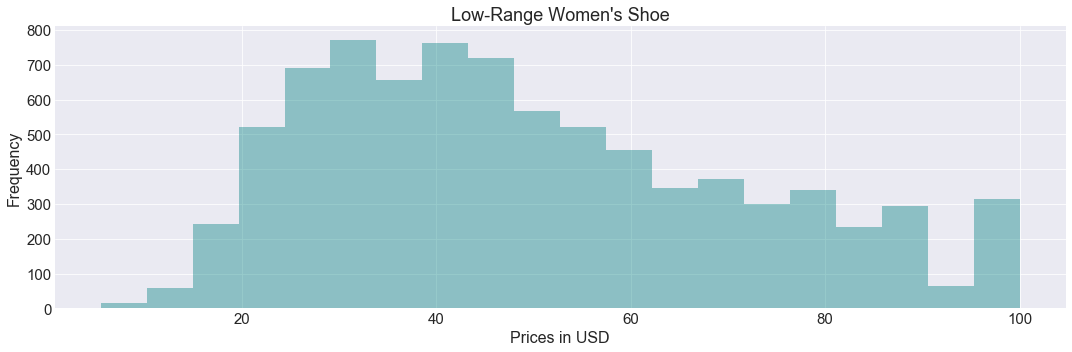

In [19]:
#filter dataframe for less than 100 USD shoe:
lowrange_shoe = ws_df[ws_df['prices.average'] <= 100]
print (lowrange_shoe.shape)

#distplot for lowrange shoe:
plt.figure(figsize=(15,5))
sns.distplot(lowrange_shoe['prices.average'], kde=False, color='teal', bins=20)
plt.title("Low-Range Women's Shoe" , fontsize=18)
plt.xlabel('Prices in USD', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(labelsize=15)
plt.tight_layout()

* **We can clearly see that a huge amoung of shoes have been sold from price range 20 USD to 50 USD.**
* **Even in the price range 60 to 90 there is good sales.**
### If we look deeply at the shape, it clearly says that 8246/10000 shoes have been sold out in the range 10USD TO 100 USD. 



(1736, 11)


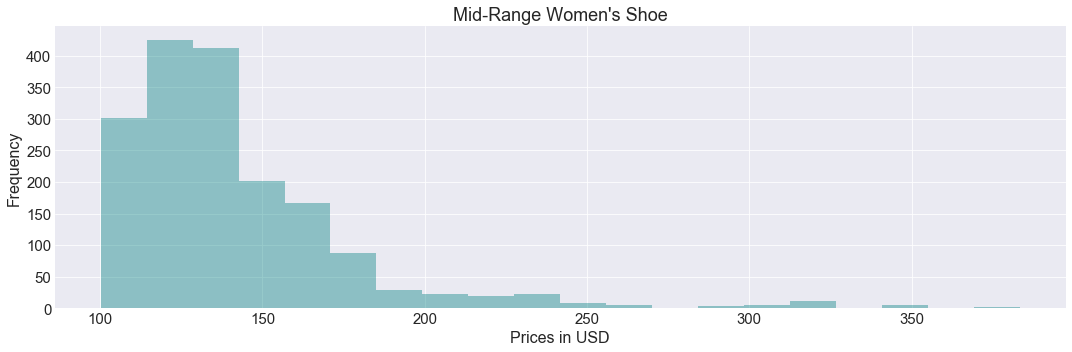

In [20]:
#filter dataframe for 101-500 USD shoe:
midrange_shoe = ws_df[(ws_df['prices.average'] > 100) & (ws_df['prices.average'] <=500)]
print (midrange_shoe.shape)
#distplot for midrange shoe:
plt.figure(figsize=(15,5))
sns.distplot(midrange_shoe['prices.average'], kde=False, color='teal', bins=20)
plt.title("Mid-Range Women's Shoe" , fontsize=18)
plt.xlabel('Prices in USD', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(labelsize=15)
plt.tight_layout()

* **We can clearly see that the midrange shoes are mostly sold most in the range 100 to 150**
* **Almost 17% of the shoes are sold in this range**.

(18, 11)


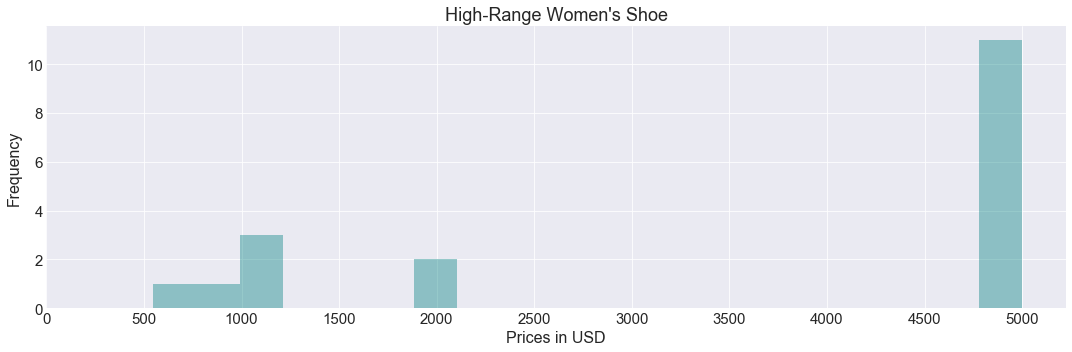

In [21]:
#filter dataframe for 501-5000 USD shoe:
highrange_shoe = ws_df[(ws_df['prices.average'] >500 ) & (ws_df['prices.average'] <= 5000)]
print (highrange_shoe.shape)

#distplot for midrange shoe:
plt.figure(figsize=(15,5))
sns.distplot(highrange_shoe['prices.average'], kde=False, color='teal', bins=20)
plt.title("High-Range Women's Shoe" , fontsize=18)
plt.xlabel('Prices in USD', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(labelsize=15)
plt.xticks(np.arange(0, 5001, 500))
plt.tight_layout()

* **The Highest value of the shoe sold is 5000**
* **Only 18 shoes are sold in this range**

## INFERENCE AND OUTCOMES 6 : 
* **Huge customer base in Women Shoes  are buying shoes in the price range mostly in 10 USD TO  100 USD.**
* **Only 15% customer base is buying shoes in the range 100 USD to 250 USD**
* **Very little or exclusive few customers have bought shoes in the range 500 USD to 5000 USD**


# END OF M2-W5 PROJECT